In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from uproot_io import Events, View

In [100]:
# Interaction type lookup
import csv
interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
# print(interaction_dictionary)

In [129]:
events = Events("/Users/mohammed/code/PandoraRecoFile_1.root")

In [107]:
def hits(event_number):
    """Needs to return number of hits divided by the 
    length of the particle track/shower, and the particle type"""
    
    # Accessing a specific event.
    idx = np.where(events.event_number == event_number)[0]
    
    particleType = np.array([])
    allHits = np.array([])
    
    # Looping through each particle from the event
    for i in idx:
        
        # The position coordinates for the particle
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        
        if x.size == 0:
            continue
            
        else:
            
            # The number of hits
            hit = len(x)
        
            # Finding the length
            xmin, xmax = x[0], x[-1]
            zmin, zmax = z[0], z[-1]
        
            length = np.sqrt((xmax - xmin)**2 + (zmax - zmin)**2)
            
            if length == 0:
                continue
                
            else:
                result = hit / length
                allHits = np.append(allHits, result)
                
                # Finding the particle type
                pdg = events.mc_pdg[i]
                particleType = np.append(particleType, pdg)
                
            
            # Plotting each particle
#             plt.scatter(x, z, s = 50)
#             plt.scatter(xmin, zmin, c='red', s=10)
#             plt.scatter(xmax, zmax, c='red', s=10)
#             plt.show()

        
    return allHits, particleType

In [108]:
hits(0)

(array([0.67799889, 2.29642591, 4.1731376 , 4.17093318, 0.24087544,
        0.20609004, 0.13435379, 0.19684833, 0.36644953, 2.04274422,
        1.87190076, 3.95909523, 4.06677662, 2.40762383, 2.56628136,
        1.81665613, 2.16058194, 0.87408692, 0.2019298 ]),
 array([2212.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2212., 2212., 2212.,    0., 2212., 2212.,   13.,   11.,   22.,
          22.]))

In [109]:
random_numbers = np.random.randint(0, max(events.event_number), 2000)

In [110]:
h = []
p = []
for i in random_numbers:
    h, p = np.append(h, hits(i)[0]), np.append(p, hits(i)[1])

In [111]:
h.shape, p.shape

((72274,), (72274,))

In [112]:
df = pd.DataFrame({"hits": h, "particle": p})

In [113]:
# Using 0 to indicate tracks, 1 to indicate showers.

mapping = {
    11: 1,
    -11: 1,
    22: 1
}

df["class"] = df["particle"].map(mapping).fillna(0)

In [114]:
tracksQuery = df['class'] == 0.0
showersQuery = df['class'] == 1.0

ftracks = df[tracksQuery]
fshowers = df[showersQuery]

tracks = ftracks['hits'].values
showers = fshowers['hits'].values

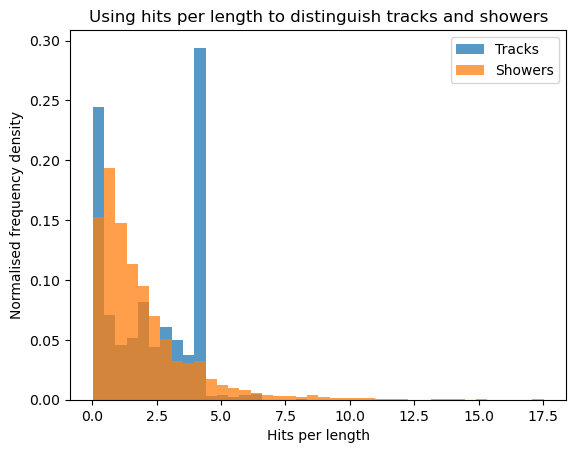

In [115]:
n_bins = 40
hist2, bin_edges = np.histogram(showers, bins=n_bins)
hist1, _ = np.histogram(tracks, bins=bin_edges)

bin_widths = np.diff(bin_edges)
    
hist1_normalized = hist1 / len(tracks)
hist2_normalized = hist2 / len(showers)

plt.bar(bin_edges[:-1], hist1_normalized, width=bin_widths, align='edge', alpha=0.75, label='Tracks')
plt.bar(bin_edges[:-1], hist2_normalized, width=bin_widths, align='edge', alpha=0.75, label='Showers')
plt.title("Using hits per length to distinguish tracks and showers")
plt.ylabel("Normalised frequency density")
plt.xlabel("Hits per length")

plt.legend()
plt.show()

In [130]:
def hitsW(event_number):
    """Needs to return number of hits divided by the 
    length of the particle track/shower, and the particle type"""
    
    # Accessing a specific event.
    idx = np.where(events.event_number == event_number)[0]
    
    particleType = np.array([])
    allHits = np.array([])
    
    # Looping through each particle from the event
    for i in idx:
        
        # The position coordinates for the particle
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        
        if x.size == 0:
            continue
            
        else:
            
            # The number of hits
            hit = len(x)
                
            allHits = np.append(allHits, hit)
                
            # Finding the particle type
            pdg = events.mc_pdg[i]
            particleType = np.append(particleType, pdg)
                
            
            # Plotting each particle
#             plt.scatter(x, z, s = 50)
#             plt.scatter(xmin, zmin, c='red', s=10)
#             plt.scatter(xmax, zmax, c='red', s=10)
#             plt.show()

        
    return allHits, particleType

In [131]:
random_numbers = np.random.randint(0, max(events.event_number), 2000)

In [132]:
h = []
p = []
for i in random_numbers:
    h, p = np.append(h, hitsW(i)[0]), np.append(p, hitsW(i)[1])

In [133]:
h.shape, p.shape

((10320,), (10320,))

In [134]:
df = pd.DataFrame({"hits": h, "particle": p})

In [135]:
# Using 0 to indicate tracks, 1 to indicate showers.

mapping = {
    11: 1,
    -11: 1,
    22: 1
}

df["class"] = df["particle"].map(mapping).fillna(0)

In [136]:
tracksQuery = df['class'] == 0.0
showersQuery = df['class'] == 1.0

ftracks = df[tracksQuery]
fshowers = df[showersQuery]

tracks = ftracks['hits'].values
showers = fshowers['hits'].values

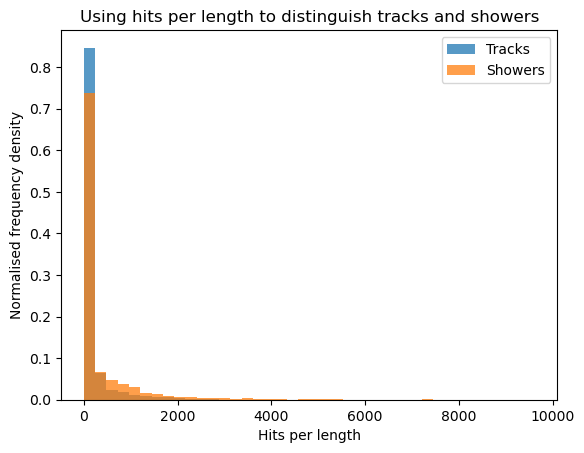

In [137]:
n_bins = 40
hist2, bin_edges = np.histogram(showers, bins=n_bins)
hist1, _ = np.histogram(tracks, bins=bin_edges)

bin_widths = np.diff(bin_edges)
    
hist1_normalized = hist1 / len(tracks)
hist2_normalized = hist2 / len(showers)

plt.bar(bin_edges[:-1], hist1_normalized, width=bin_widths, align='edge', alpha=0.75, label='Tracks')
plt.bar(bin_edges[:-1], hist2_normalized, width=bin_widths, align='edge', alpha=0.75, label='Showers')
plt.title("Using hits per length to distinguish tracks and showers")
plt.ylabel("Normalised frequency density")
plt.xlabel("Hits per length")

plt.legend()
plt.show()